# **Logistické zobrazenie a jeho dynamika**

Tento materiál vznikol za podpory grantu VVGS-2022-2412.

**Logistické zobrazenie** je polynomiálna funkcia stupňa 2 (je súčasťou všeobecnejšej triedy unimodálnych máp), často označované ako archetypálny príklad toho, ako zložité, chaotické správanie môže vzniknúť z veľmi jednoduchých nelineárnych dynamických rovníc. Spopularizoval ju v roku 1976 biológ Robert May ako demografický model s diskrétnym časom, ktorý je analógiou logistickej rovnici, ktorú napísal Pierre François Verhulst.

Matematicky:
$$x_{n+1}=rx_{n}(1-x_{n})$$ generuje iterácia funkcie $f(x)=rx(1-x)$	na intervale $[0,1]$ pre daný parameter $r\in[0,4]$ pre zadanú počiatočnú hodnotu $x_0\in[0,1]$.

Ergodická teória je oblasťou dynamických systémov, ktorá sa zaoberá otázkami priemerov. O mnohých jednoduchých dynamických systémoch je známe, že sú chaotické, čo znamená, že dlhodobé predpovede nie sú možné z počiatočných údajov s obmedzenou presnosťou. Niekedy môže ergodická teória predpovedať priemerné správanie, aj keď sú systémy chaotické, teda je možné urobiť presné
závery o pravdepodobnosti budúceho stavu. Ak má (možno chaotický) dynamický systém atraktor, potom existuje miera pravdepodobnosti, ktorá udáva dlhodobý podiel času stráveného systémom v rôznych oblastiach atraktora. V prípade logistickej funkcie s parametrom $r = 4$ a počiatočným stavom v $(0,1)$ je atraktorom interval $(0,1)$ a miera pravdepodobnosti zodpovedá rozdeleniu beta s parametrami $a = 0.5$ a $b = 0.5$, teda arcusínusové rozdelenie s hustotou

$${\displaystyle {\frac {1}{\pi {\sqrt {x(1-x)}}}}.}$$

In [2]:
#Načítame si potrebné knižnice
from math import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML
from scipy.stats import arcsine

In [4]:
#NP = arcsine()  #nahodná premenná arcsin rozdelenia
def log_map(x,r): return r*x*(1-x)    # logistická funkcia s parametrom r
def inv_hust(x): return 1/np.sqrt(x*(1-x))/np.pi   #ručne definovaná hustota NP

def iteruj(n, x, r):  #iterácia  logistickej funkcie

    for i in range(1,n):
        x = log_map(x, r)
    return x

In [3]:
R=4  #nastavenie parametra r
N = 5000  #počet bodov intervalu [0,1]
x0 = np.random.uniform(0,1,N)   #uniformné vygenerovanie náhodnej počiatočnej hodnoty
HIST_BINS = np.linspace(0, 1, 100)   #nastavenie intervalov - tried v histograme
iteracie=15   #počet iterácií

data = x0
n, _ = np.histogram(data, HIST_BINS, density=True)
x = np.linspace(0.007,0.993)  #ohraničenie kvôli singularitám v krajných bodoch
#x = np.linspace(0, np.minimum(NP.dist.b, 3))
# NP.dist.b je pravým koncovým bodom nosiča NP.dist

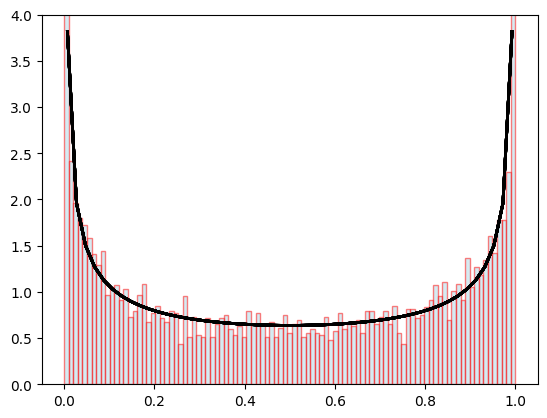

In [4]:
fig, ax = plt.subplots()

def prepare_animation(bar_container):

    def animate(frame_number):
        # simulujeme nové dáta
        data = iteruj(frame_number,x0,R)
        n, _ = np.histogram(data, HIST_BINS, density=True)    #musi byt density=True !!!
        fig = plt.plot(x, inv_hust(x), lw=2,color = "black")
        for count, rect in zip(n, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches
    return animate

_, _, bar_container = ax.hist(data, HIST_BINS, density=True , lw=1, color = "lightblue", ec="red", alpha=0.5)
ax.set_ylim(top=4)  # nastavenie ohraničenia, aby bolo zabezpečené, že všetky údaje budú viditeľné

anim = animation.FuncAnimation(fig=fig, func=prepare_animation(bar_container), frames=iteracie, repeat=False, blit=True, interval=1000)
HTML(anim.to_html5_video())

Presnejšie informácie poskytujú rôzne ergodické vety, ktoré tvrdia, že za určitých podmienok existuje časový priemer funkcie pozdĺž trajektórií takmer všade a súvisí s priestorovým priemerom. Vo všeobecnosti môže byť časový a priestorový priemer odlišný. Ale ak je transformácia ergodická a miera je invariantná, potom sa časový priemer takmer všade rovná priemeru priestoru.

# Birkhoffova–Chinčinova-Hopfova veta o ergodicite:

Nech $(X,\Sigma,\mu)$ je priestor so $\sigma$-konečnou mierou  a $T\colon X\to X$ je transformácia zachovávajúca mieru.

  Potom pre ľubovoľnú funkciu $f\in \mathcal{L}^1(X,\Sigma,\mu)$, limita
${\displaystyle {\hat {f}}(x)=\lim _{n\rightarrow \infty }\;{\frac {1}{n}}\sum _{j=0}^{n-1}f(T^{[j]}x)}$
existuje pre skoro všetky $x\in X$ a $\hat {f}\in \mathcal{L}^1(X,\Sigma,\mu)$.

 Ak $\mu(X)<\infty$, potom $\int_X f\,\mathrm{d} \mu=\int_X \hat {f}\,\mathrm{d} \mu,$ a  ak navyše je $T$ ergodické, tak platí Boltzmannova ergodická hypotéza, teda

  $$\hat {f}=\overline{f}:=\frac{1}{\mu(X)}\int_X f\,\mathrm{d} \mu.$$


In [25]:
from scipy import pi, cos
from scipy.integrate import quad


def time_average(x, f, T, n):
  s = 0
  for k in range(n-1):
    s += f(x)
    x = T(x)
  return s/n

def space_average(f):
  integral = quad(f, 0, 1)[0]
  return integral

rr = 4
def logM(x): return rr*x*(1-x)
f = lambda x: cos(x)**2    #ľubovoľná L1 funkcia - napr. cos(x)^2
N = 1000000

def newf(x): return f(x)*inv_hust(x)

print( time_average(1/5, f, logM, N) )  #platí pre s.v. hodnoty v [0,1] - napr. 1/5
print( space_average(newf) )  #integrál z f(x)p(x), kde p(x) je arcsine hustota

<ipython-input-25-656990519539>:18: DeprecationWarning: scipy.cos is deprecated and will be removed in SciPy 2.0.0, use numpy.cos instead
  f = lambda x: cos(x)**2    #ľubovoľná L1 funkcia


0.7066031832659987
0.7067190372461291


# Coweb diagram

Pavučinový graf (Coweb diagram) alebo Verhulstov diagram je vizuálny nástroj používaný v oblasti dynamických systémov matematiky na skúmanie kvalitatívneho správania jednorozmernej iterovanej funkcie.

In [ ]:
!pip install -q ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.1 MB/s eta 0:00:00


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

interactive(children=(IntSlider(value=14, description='step', max=40), FloatSlider(value=1.5, description='r',…

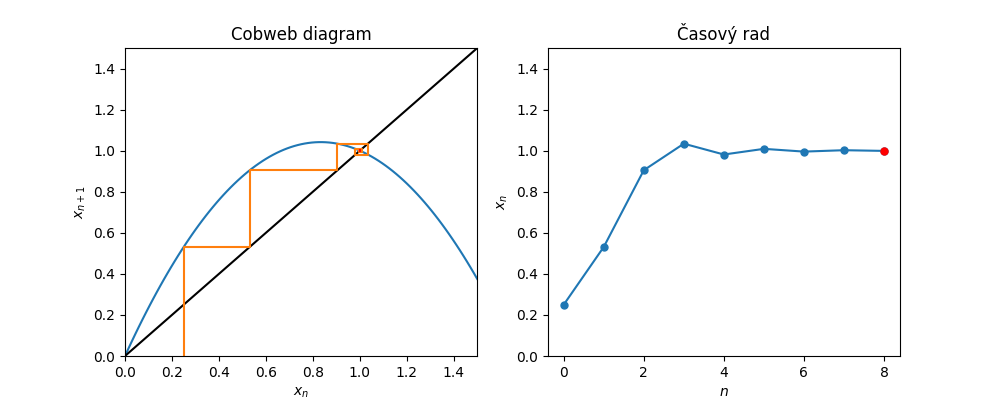

In [ ]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

# Definujme parametere
COBWEB_MAX = 20 # počet iterácií

def lmap(x, lim=1.0, r=1.0, h=0.0):
    """Diskrétna logistická funkcia s absolútnym zberom.

    x - vstupná hodnota

     lim (1,0) - populačný limit
     r (1,0) - vnútorná rýchlosť rastu
    """

    return x + r*x*(1 - (x/lim)) - h

def tmap(x, lb=0.5, ub=1.0, r=1.0):
    """Diskrétny rast populácie s hornou a dolnou stabilnou hranicou populácie.

     x - vstupná hodnota

     lb (0,5) - spodná hranica populácie
     ub (1,0) - horná hranica populácie
     r (1,0) - vnútorná rýchlosť rastu
    """

    return x + r*x*(x-lb)*(ub-x)

def mmap(x, r=0.0):
    """Diskrétna mapa mala mať nastaviteľný sklon v jednej z rovnovážnych hodnôt.

     x - vstupná hodnota

    r (0,0) - sklon v strednom rovnovážnom bode (<= 1,5)
    """

    a = 4 - 4*r
    return (a*x*x - 1.5*a*x + (1.0 + 0.5*a))*x

def cobweb_update(x0, cwx, cwy, lim=1.0, r=1.0, mode=0):
    """Aktualizujeme globálne zoznamy "pavučín". Zoznamy sa upravujú na mieste.

     x0 - počiatočná hodnota populácie
     cwx - odkaz na zoznam x-hodnôt grafu pavučiny
     cwy - odkaz na zoznam y-hodnôt grafu pavučiny

     lim (1,0) - populačný limit
     r (1,0) - vnútorná rýchlosť rastu
     mode (0) - 0 pre logistiku so zberom, 1 pre ohraničenú populáciu, 2 pre mapu sklonov
    """

    # Vygenerujte súradnice v cobweb diagrame
    cwx[0] = x0
    cwy[0] = 0.0
    for i in range(0, 2*COBWEB_MAX, 2):
        cwx[i+1] = cwx[i]
        if mode == 0:
            cwy[i+1] = max(lmap(cwx[i], r=r), 0.0)
        elif mode == 1:
            cwy[i+1] = max(tmap(cwx[i], r=r), 0.0)
        elif mode == 2:
            cwy[i+1] = max(mmap(cwx[i], r=r), 0.0)
        cwx[i+2] = cwy[i+1]
        cwy[i+2] = cwy[i+1]
    cwx[-1] = cwx[-2]
    if mode == 0:
        cwy[-1] = max(lmap(cwx[-1], r=r), 0.0)
    elif mode == 1:
        cwy[-1] = max(tmap(cwx[-1], r=r), 0.0)
    elif mode == 2:
        cwy[-1] = max(mmap(cwx[-1], r=r), 0.0)

# Generuje x- a n-hodnoty
x = np.linspace(0, 1.5, 101)
nval = [np.floor((n+1)/2) for n in range(2*COBWEB_MAX+2)]

# Vytvorme vedľa seba grafy a inicializujte zoznamy súradníc
figs1, ax1 = plt.subplots(1, 2, figsize=(10, 4))
cwx1 = np.zeros(2*COBWEB_MAX+2) # cobweb x-súradníce
cwy1 = np.zeros_like(cwx1) # cobweb y-súradníce

# Kreslenie čiar
@widgets.interact(step=(0, 2*COBWEB_MAX, 1), r=(0.5, 3.0, 0.01), x0=(0.0, 1.25, 0.01))
def update1(step=14, r=1.5, x0=0.25):
    global ax1, cwx1, cwy1

    # Cobweb kreslenie
    ax1[0].clear()
    ax1[0].set_xlim([0, 1.5])
    ax1[0].set_ylim([0, 1.5])
    ax1[0].grid(False)
    ax1[0].set_title("Cobweb diagram")
    ax1[0].set_xlabel("$x_n$")
    ax1[0].set_ylabel("$x_{n+1}$")
    cobweb_update(x0, cwx1, cwy1, r=r, mode=0) #0 pre logistiku so zberom, 1 pre ohraničenú populáciu, 2 pre mapu sklonov
    ax1[0].plot(x, lmap(x, r=r), color="C0")
    ax1[0].plot(x, x, color="black")
    ax1[0].plot(cwx1[:step+2], cwy1[:step+2], color="C1")
    ax1[0].plot(cwx1[step:step+2], cwy1[step:step+2], color="red")

    # Bodový diagram
    ax1[1].clear()
    ax1[1].set_ylim([0, 1.5])
    ax1[1].grid(False)
    ax1[1].set_title("Časový rad")
    ax1[1].set_xlabel("$n$")
    ax1[1].set_ylabel("$x_n$")
    ax1[1].plot(np.append([0], nval[1:step+2:2]), np.append([x0], cwy1[1:step+2:2]), color="C0", marker=".", markersize=10)
    ax1[1].plot(nval[step+1], cwy1[step+1], color="red", marker=".", markersize=10)

# Bifurkácia

Bifurkačná teória je matematická štúdia zmien v kvalitatívnej alebo topologickej štruktúre danej triedy kriviek, ako sú integrálne krivky tried vektorových polí a riešenia diferenciálnych, či diferenčných rovníc. Najčastejšie sa pri matematickom štúdiu dynamických systémov používa bifurkácia, keď malá hladká zmena hodnôt parametrov (parametrov bifurkácie) systému spôsobí náhlu „kvalitatívnu“ alebo topologickú zmenu v jeho správaní.

In [5]:
n = 1000000  # celkový počet bodov pre parameter r
r = np.linspace(0.0, 4.0, n)
iteracie2 = 40

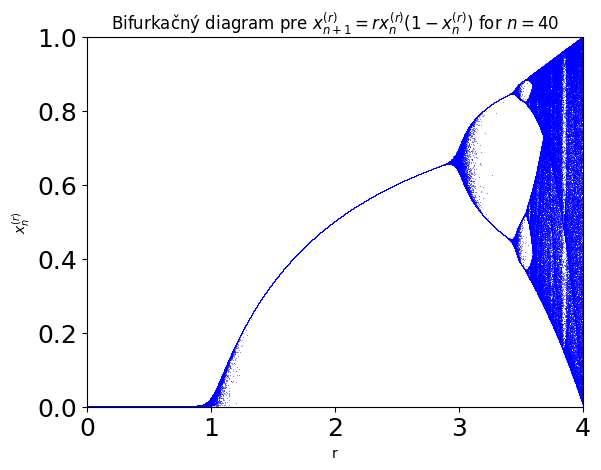

In [7]:
fig2 = plt.figure()
ax2 = plt.axes()

def animate2(i):
    plt.cla()
    ax2.set_title(f"Bifurkačný diagram pre $x^{{(r)}}_{{n + 1}} = rx^{{(r)}}_{{n}}(1 - x^{{(r)}}_{{n}})$ pre $n=${i + 1}")
    ax2.set_xlabel('r')
    ax2.set_ylabel('$x^{(r)}_{n}$')
    ax2.tick_params(axis='both', which='major', labelsize=18)
    ax2.set_xlim(0.0, 4.0)
    ax2.set_ylim(0.0, 1.0)

    x = np.random.uniform(0.0, 1.0, n)  # náhodný počiatočný stav
    for _ in range(i + 1):  # iterácie animácie
        x = log_map(x,r)

    l = ax2.plot(r, x, ',b', alpha=.5)
    return l

# zavolá animátor
anim2 = animation.FuncAnimation(fig2, animate2, frames=iteracie2, repeat=False, blit=True, interval=1000)
#anim.save('bifur.gif',writer='imagemagick')
HTML(anim2.to_html5_video())

# Lyapunove exponenty

Lyapunovov exponent alebo Lyapunovov charakteristický exponent dynamického systému je veličina, ktorá charakterizuje rýchlosť separácie nekonečne blízkych trajektórií a pre systémy s diskrétnym časom je definovaný ako
$$\lambda(r) = \lim_{n \to \infty} \frac{1}{n} \sum_{i=0}^{n-1} \log\left| \frac{df_r}{dx}\left(x_i^{(r)}\right) \right|
$$.

Vypočítame teraz aproximáciu Lyapunovovho exponentu pre hodnoty parametra $r$.



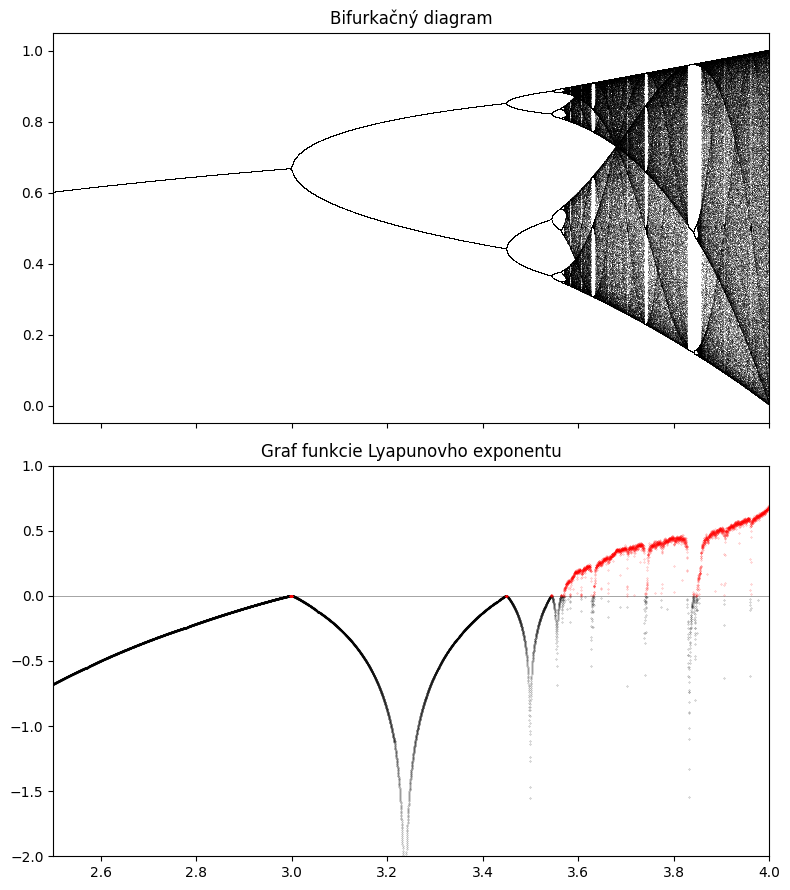

In [5]:
n = 10000
r = np.linspace(2.5, 4.0, n)   #simuluje dáta pre parameter v intervale 2.5 až 4
iterations = 1000
last = 100
x = 1e-5 * np.ones(n)
lyapunov = np.zeros(n)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9), sharex=True)

for i in range(iterations):
    x = log_map(x, r)
    # spočítame čiastočné súčty lyap. exp.
    lyapunov += np.log(abs(r - 2 * r * x))
    # zobrazíme bifurk. diagram
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurkačný diagram")

# zobrazíme Lyapunove exponenty a horizontálnu čiaru
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Záporné Lyapunove exponenty
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Kladné Lyapunove exponenty
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-2, 1)
ax2.set_title("Graf funkcie Lyapunovho exponentu")
plt.tight_layout()

Všimnime si, že bifurkačný diagram ukazuje existenciu pevného bodu pre $r<3$ , potom dve a štyri ekvilibria a chaotické správanie, keď $r$ patrí do určitých oblastí priestoru parametrov.

Pozorujeme zároveň dôležitú vlastnosť Lyapunovovho exponentu: keď je systém chaotický tak je kladný (červený) .